# World Cup Fantasy Team Generator

### December 7, 2017

Dear Chris,

After our brief discussions about picking which countries to root for for the world cup this year, I decided to try my hand at making a generator that picked 4 fair teams of eight countries each. I'm be curious to hear your thoughts.   

-Taylor

In [101]:
import pandas as pd
from random import sample
import numpy as np
from itertools import permutations
from itertools import combinations_with_replacement
from itertools import chain

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Country Rankings
To compute the cost of each team, I started with the current betting odds on them according to the [Westgate Las Vegas SuperBook](http://www.espn.com/chalk/story/_/id/20991480/soccer-odds-win-2018-fifa-world-cup). Since I wanted to penalize the good teams even more, I use the natural log of the odds to weigh each team. Better countries have lower numbers, so the lower your total team number, the better your team.

In [105]:
country_costs = {'Russia':30,'Saudi Arabia':1000,'Egypt':150,'Uruguay':25,\
             'Portugal':20,'Spain':7,'Morocco':250,'Iran':250,\
             'France':5.5,'Australia':250,'Peru':200,'Denmark':80,\
             'Argentina':8,'Iceland':200,'Croatia':30,'Nigeria':200,\
             'Brazil':5,'Switzerland':80,'Costa Rica':250,'Serbia':150,\
             'Germany':4.5,'Mexico':60,'Sweden':80,'South Korea':500,\
             'Belgium':12,'Panama':1000,'Tunisia':500,'England':20,\
             'Poland':40,'Senegal':150,'Colombia':25,'Japan':125}

In [106]:
countries = [*country_costs]
costs_raw = list( country_costs.values() )
costs = list(map(lambda x: np.log(x), costs_raw) )

### Distribution of Rankings

We can tweak the cost formula as needed, but as it stands, the spread of values looks pretty reasonable, but maybe we want more of a spread among the best couple of teams? 

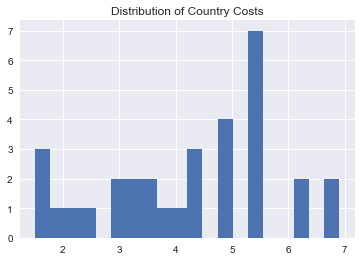

In [111]:
plt.hist(costs,bins=20)
plt.title('Distribution of Country Costs')
plt.show()

## List out all of combinations to test for fairness

The only rule is that each team has to contain one (and only one) team from each group. That way we don't cheer against ourselves in the group stage

In [24]:
teams = [0,1,2,3]
pr = list ( permutations(teams) )
list_of_orders = list( combinations_with_replacement(pr,8) )

## Unfairness
Each team gets a score equal to the sum of each of their countries' costs. Unfairness is defined as the standard deviation of the 4 team scores.

In [96]:
def unfairness(x):
    scores = [0,0,0,0]
    for i,team in enumerate(chain(*x)):
        scores[team] += costs[i]
    return( np.std(scores) )

In [97]:
unfairness_list = list(map(unfairness,list_of_orders))

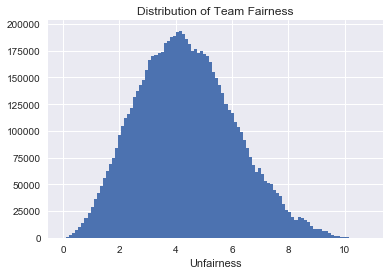

In [102]:
plt.hist(unfairness_list,bins=100)
plt.xlabel('Unfairness')
plt.title('Distribution of Team Fairness')
plt.show()

## Selecting the fairest set of teams

The best set of teams is the set with the lowest unfairness. Since there can be more than one ideal solution, one of the ideal sets is selected at random.

In [100]:
lowest_score = min(unfairness_list)
ls_idx = [i for i, v in enumerate(unfairness_list) if v == lowest_score]
lucky_index = sample(ls_idx,1)[0]
the_order = list_of_orders[lucky_index]

In [83]:
groupSet = set(groups)
df = pd.DataFrame({'country':countries,'Total Cost':odds,'Fantasy Team':list(chain(*the_order))})

## How fair are the teams?

According to formula, pretty darn fair. The difference between the best and worst team is 0.018, which is tiny considering country scores range from 1.5 to 6.9

In [117]:
df.groupby('Fantasy Team').sum()

,odds
Fantasy Team,
0,33.894419
1,33.900117
2,33.898874
3,33.881768


## Whats Next?

I could have displayed the teams here, but I didn't want to ruin the suprise in case we keep it this way. The thing to decide is if we like the cost function the way it is and how to award points during the world cup.